# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Mar-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer and do not have epilepsy.

#### Report 3 - focus on the demographics of the research population; c. focus on deprivation

In [74]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

# set month for covid reference line
covid = ("2022-04-01")

# set position for covid text
pos_text_covid = ("2022-03-01")

# set month for chart labels
pos_chart_labels = ("2022-10-01")

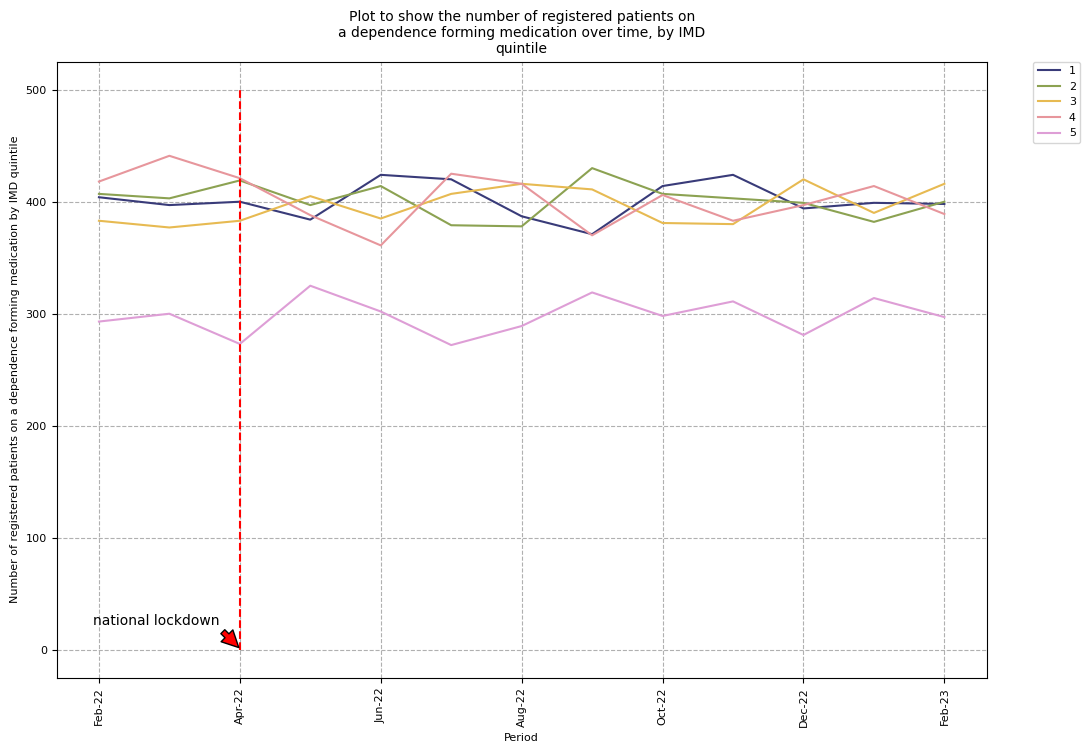

In [75]:
data_measure_dfm_medications_imd_rate = pd.read_csv("../output/measure_dfm_medications_by_imd_q5_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_imd_rate = data_measure_dfm_medications_imd_rate.loc[data_measure_dfm_medications_imd_rate["imd_q5"] != "Unknown", :]
df_measure_dfm_medications_imd_rate = pd.DataFrame.pivot(data_measure_dfm_medications_imd_rate, index='date', columns='imd_q5', values='research_population')
df_measure_dfm_medications_imd_rate.index = pd.to_datetime(df_measure_dfm_medications_imd_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_imd_rate.plot(fontsize=8, figsize=(12,8), colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=500,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by IMD quintile'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_imd_rate_plot.png", bbox_inches='tight', dpi=100)
plt.show()

In [76]:
print(tabulate(df_measure_dfm_medications_imd_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_imd_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      1    2    3    4    5
------  ---  ---  ---  ---  ---
Feb-22  404  407  383  418  293
date      1    2    3    4    5
------  ---  ---  ---  ---  ---
Feb-23  398  400  416  389  297


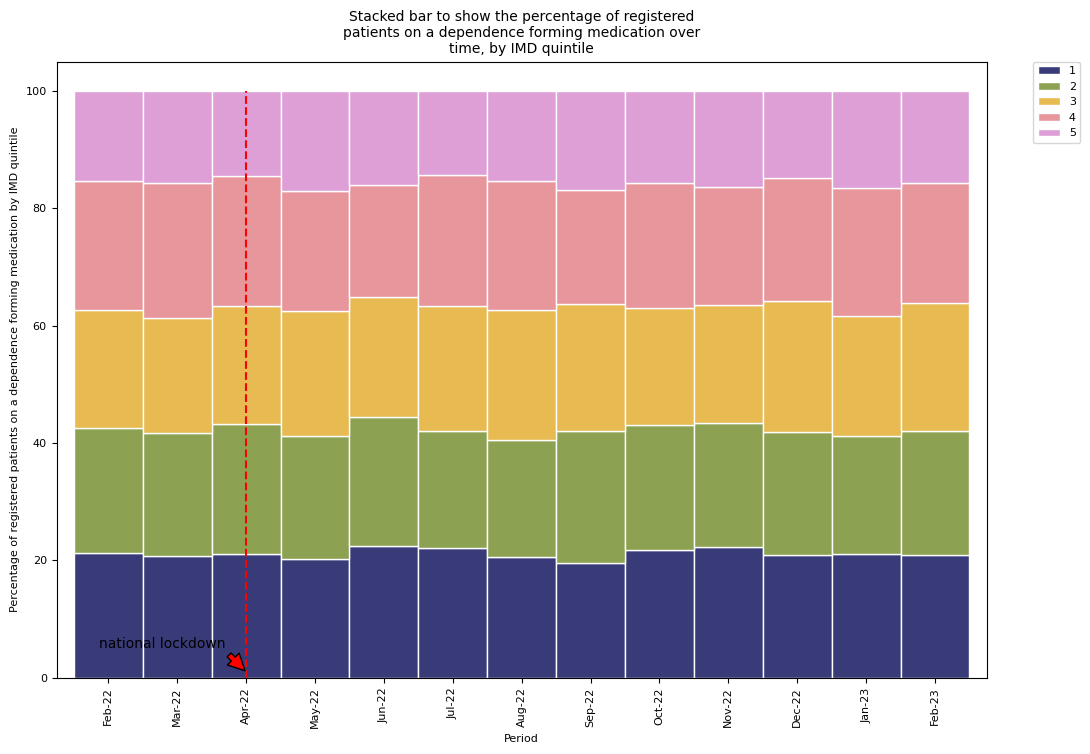

In [77]:
df_imd_stacked = pd.DataFrame(df_measure_dfm_medications_imd_rate)
df_imd_stacked.head()
totim = df_imd_stacked.sum(axis=1)
perim = df_imd_stacked.div(totim, axis=0).mul(100).round(2)
ax = perim.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by IMD quintile'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_imd_rate_bar.png", bbox_inches='tight', dpi=100)
plt.show()

In [78]:
print(tabulate(perim.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perim.iloc[-1:], headers='keys', tablefmt = 'simple'))

date        1      2     3      4      5
------  -----  -----  ----  -----  -----
Feb-22  21.21  21.36  20.1  21.94  15.38
date        1      2      3      4      5
------  -----  -----  -----  -----  -----
Feb-23  20.95  21.05  21.89  20.47  15.63


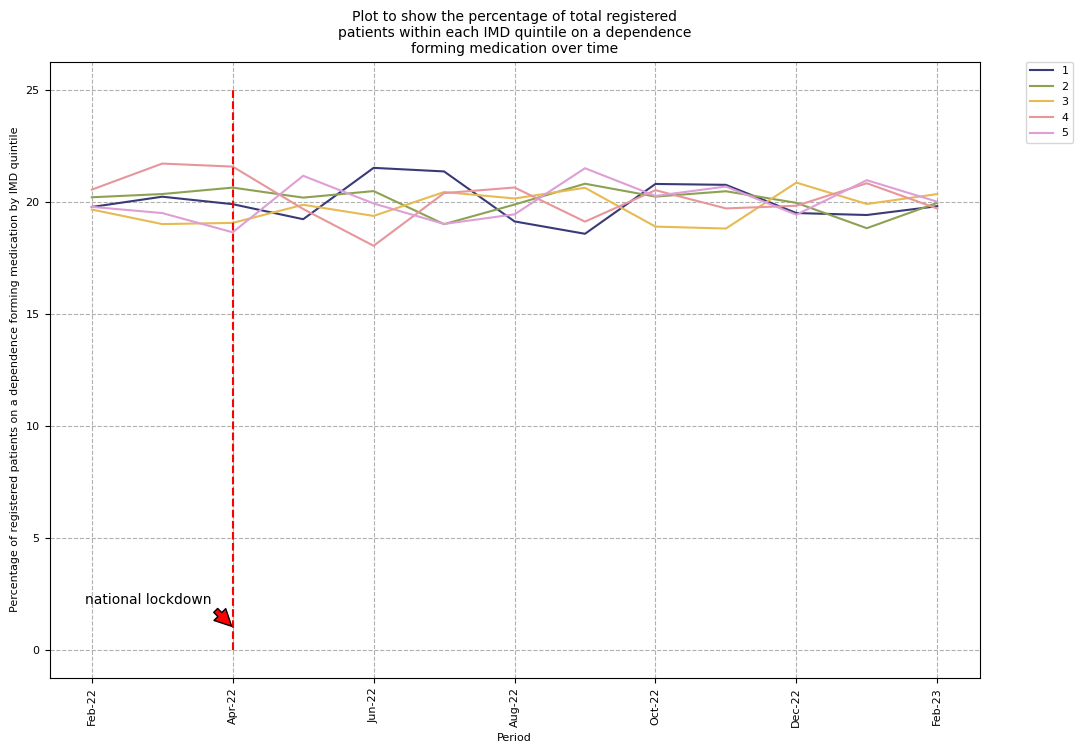

In [79]:
data_measure_dfm_medications_imd_rate['value'] = 100 * data_measure_dfm_medications_imd_rate['value']
df_measure_imd_population_rate = pd.DataFrame.pivot(data_measure_dfm_medications_imd_rate, index='date', columns='imd_q5', values='value')
df_measure_imd_population_rate.index = pd.to_datetime(df_measure_imd_population_rate.index).strftime('%b-%y')
ax = df_measure_imd_population_rate.plot(fontsize=8, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the percentage of total registered patients within each IMD quintile on a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_imd_population_rate_plot.png", bbox_inches='tight', dpi=100)
plt.show()

In [80]:
print(tabulate(df_measure_imd_population_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_imd_population_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date          1        2        3        4        5
------  -------  -------  -------  -------  -------
Feb-22  19.7652  20.1985  19.6511  20.5405  19.7706
date         1        2        3        4    5
------  ------  -------  -------  -------  ---
Feb-23  19.801  19.9501  20.3423  19.6962   20


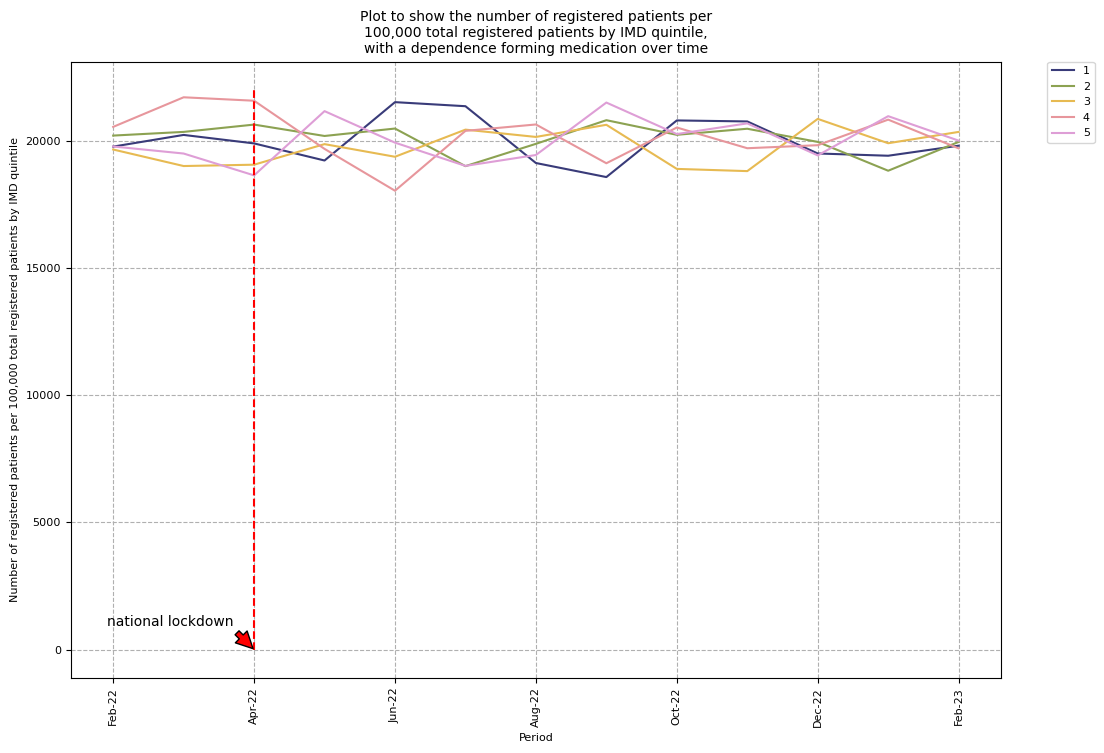

In [81]:
df_temp = pd.DataFrame(data_measure_dfm_medications_imd_rate)
df_imd_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_imd_research_population = pd.DataFrame.pivot(df_imd_research_population, index='date', columns='imd_q5', values='weighted_research_population')
df_imd_research_population.index = pd.to_datetime(df_imd_research_population.index).strftime('%b-%y')
ax = df_imd_research_population.plot(fontsize=8, figsize=(12,8), colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=22000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by IMD quintile, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_imd_weighted_plot.png", bbox_inches='tight', dpi=100)
plt.show()

In [82]:
print(tabulate(df_imd_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_imd_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date          1        2        3        4        5
------  -------  -------  -------  -------  -------
Feb-22  19765.2  20198.5  19651.1  20540.5  19770.6
date        1        2        3        4      5
------  -----  -------  -------  -------  -----
Feb-23  19801  19950.1  20342.3  19696.2  20000


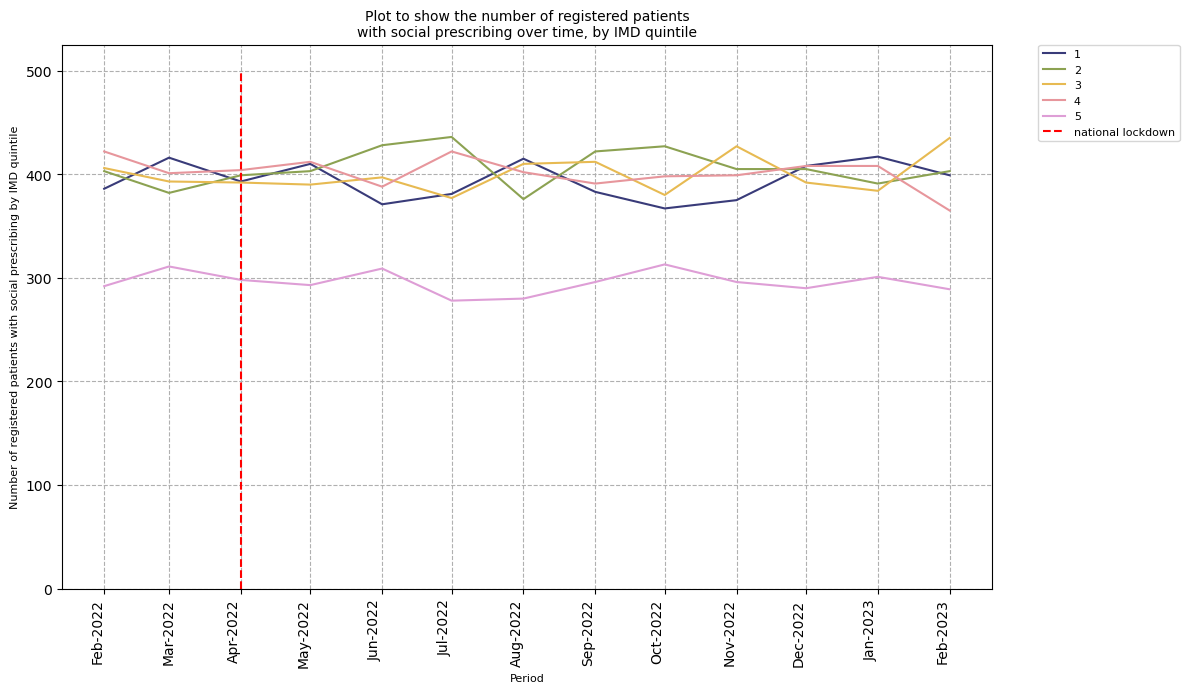

In [83]:
data_measure_social_prescribing_imd_rate = pd.read_csv("../output/measure_compare_medications_by_imd_q5_socialrx_v_consultation_rate.csv", usecols=["date", "imd_q5", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_imd_rate = data_measure_social_prescribing_imd_rate.loc[data_measure_social_prescribing_imd_rate["with_social_prescribing"] == 1, :]
data_measure_social_prescribing_imd_rate = data_measure_social_prescribing_imd_rate.loc[data_measure_social_prescribing_imd_rate["imd_q5"] != "Unknown", :]
df = pd.DataFrame(data=data_measure_social_prescribing_imd_rate) 
df2 = df.groupby(['date', 'imd_q5']).population.sum().unstack()

N = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by IMD quintile', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=500,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by IMD quintile'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["1", "2", "3", "4", "5", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_imd_rate_plot.png", bbox_inches='tight', dpi=100)
plt.show()

In [84]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   1    2    3    4    5
-------------------  ---  ---  ---  ---  ---
2022-02-01 00:00:00  386  403  406  422  292
date                   1    2    3    4    5
-------------------  ---  ---  ---  ---  ---
2023-02-01 00:00:00  399  403  435  365  289


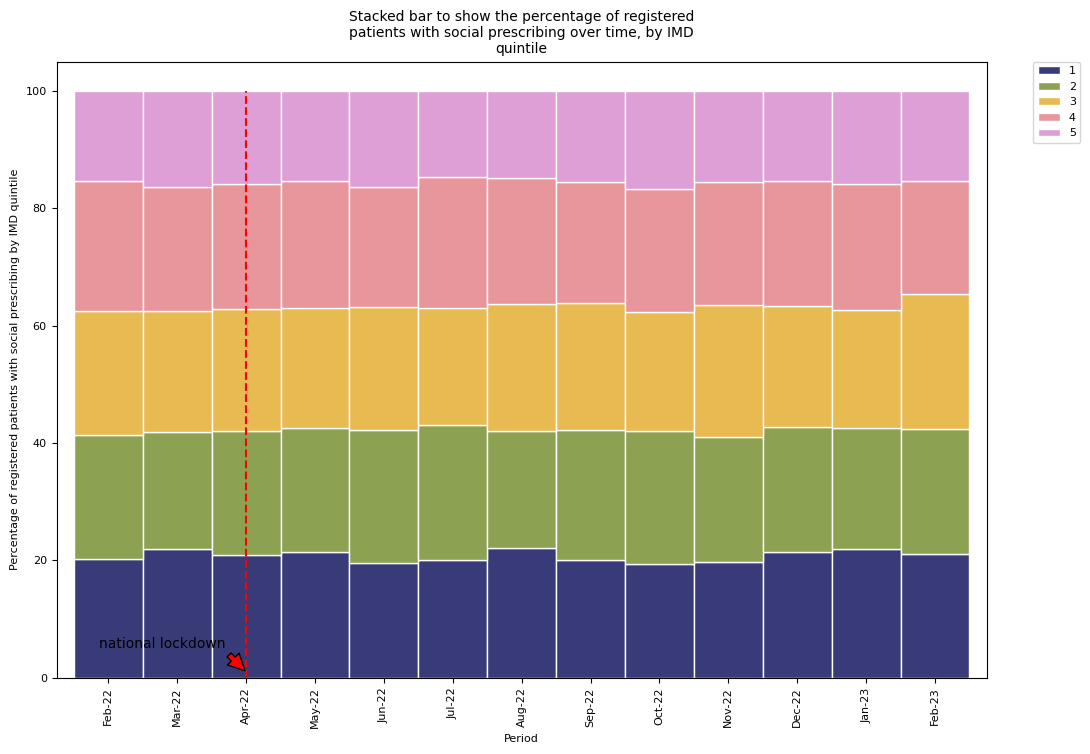

In [85]:
df_imd_social_stacked = pd.DataFrame(df2)
df_imd_social_stacked.head()
df_imd_social_stacked.index = pd.to_datetime(df_imd_social_stacked.index).strftime('%b-%y')
totis = df_imd_social_stacked.sum(axis=1)
peris = df_imd_social_stacked.div(totis, axis=0).mul(100).round(2)
ax = peris.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by IMD quintile'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_imd_rate_bar.png", bbox_inches='tight', dpi=100)
plt.show()

In [86]:
print(tabulate(peris.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peris.iloc[-1:], headers='keys', tablefmt = 'simple'))

date        1      2      3      4     5
------  -----  -----  -----  -----  ----
Feb-22  20.22  21.11  21.27  22.11  15.3
date       1      2    3     4      5
------  ----  -----  ---  ----  -----
Feb-23  21.1  21.31   23  19.3  15.28


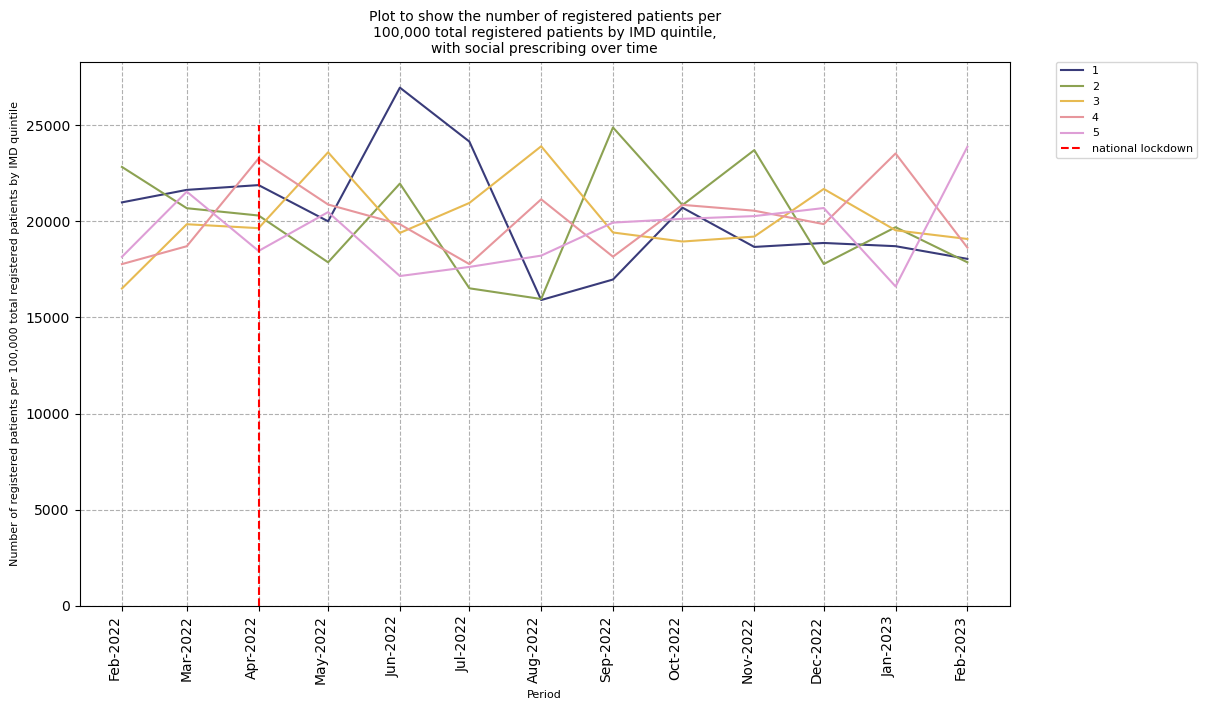

In [87]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'imd_q5']).research_population.sum().unstack() / df1.groupby(['date', 'imd_q5']).weighted_population.sum().unstack()

N = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by IMD quintile', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
        label="national lockdown",
    )

plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by IMD quintile, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["1", "2", "3", "4", "5", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_imd_weighted_plot.png", bbox_inches='tight', dpi=100)
plt.show()

In [88]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                       1        2        3        4        5
-------------------  -------  -------  -------  -------  -------
2022-02-01 00:00:00  20984.5  22828.8  16502.5  17772.5  18150.7
date                       1      2        3        4        5
-------------------  -------  -----  -------  -------  -------
2023-02-01 00:00:00  18045.1  17866  19080.5  18630.1  23875.4


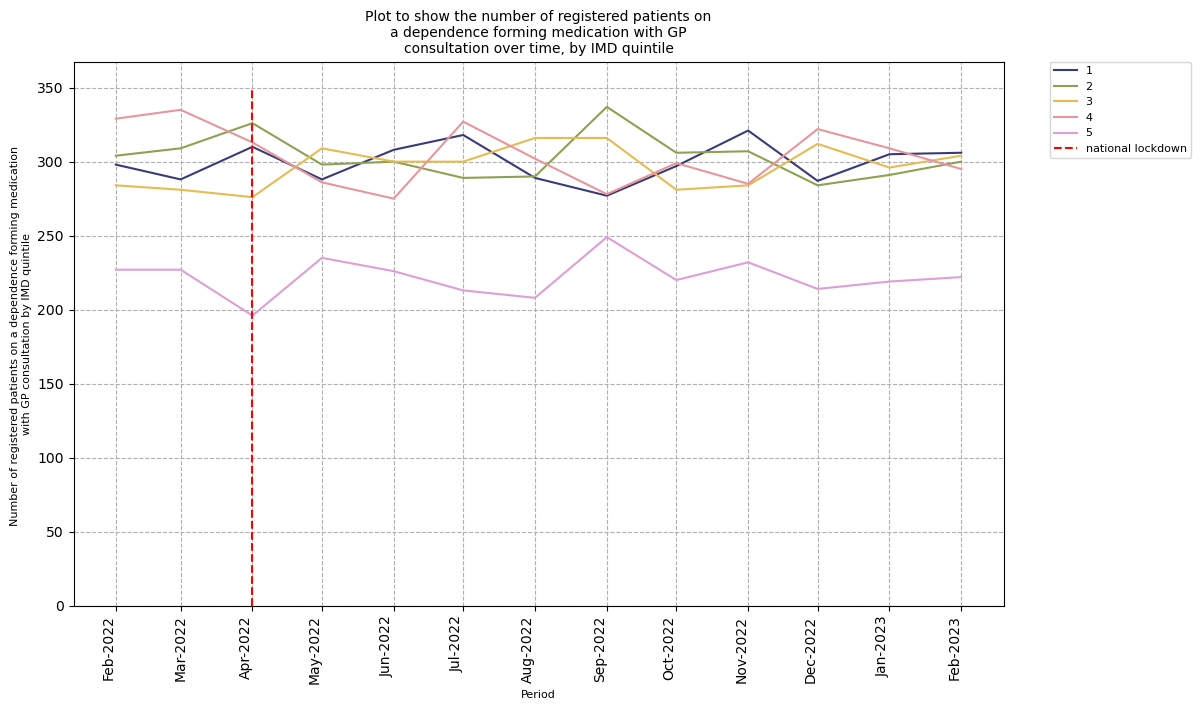

In [89]:
data_measure_consultation_imd_rate = pd.read_csv("../output/measure_compare_medications_by_imd_q5_socialrx_v_consultation_rate.csv", usecols=["date", "imd_q5", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_imd_rate = data_measure_consultation_imd_rate.loc[data_measure_consultation_imd_rate["with_consultation"] == 1, :]
data_measure_consultation_imd_rate = data_measure_consultation_imd_rate.loc[data_measure_consultation_imd_rate["imd_q5"] != "Unknown", :]
df = pd.DataFrame(data=data_measure_consultation_imd_rate)
df2 = df.groupby(['date', 'imd_q5']).research_population.sum().unstack()

N = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by IMD quintile', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=350,
        colors="red",
        ls="--",
        label="national lockdown",
    )

plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by IMD quintile'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["1", "2", "3", "4", "5", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_imd_rate_plot.png", bbox_inches='tight', dpi=100)
plt.show()


In [90]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   1    2    3    4    5
-------------------  ---  ---  ---  ---  ---
2022-02-01 00:00:00  298  304  284  329  227
date                   1    2    3    4    5
-------------------  ---  ---  ---  ---  ---
2023-02-01 00:00:00  306  300  304  295  222


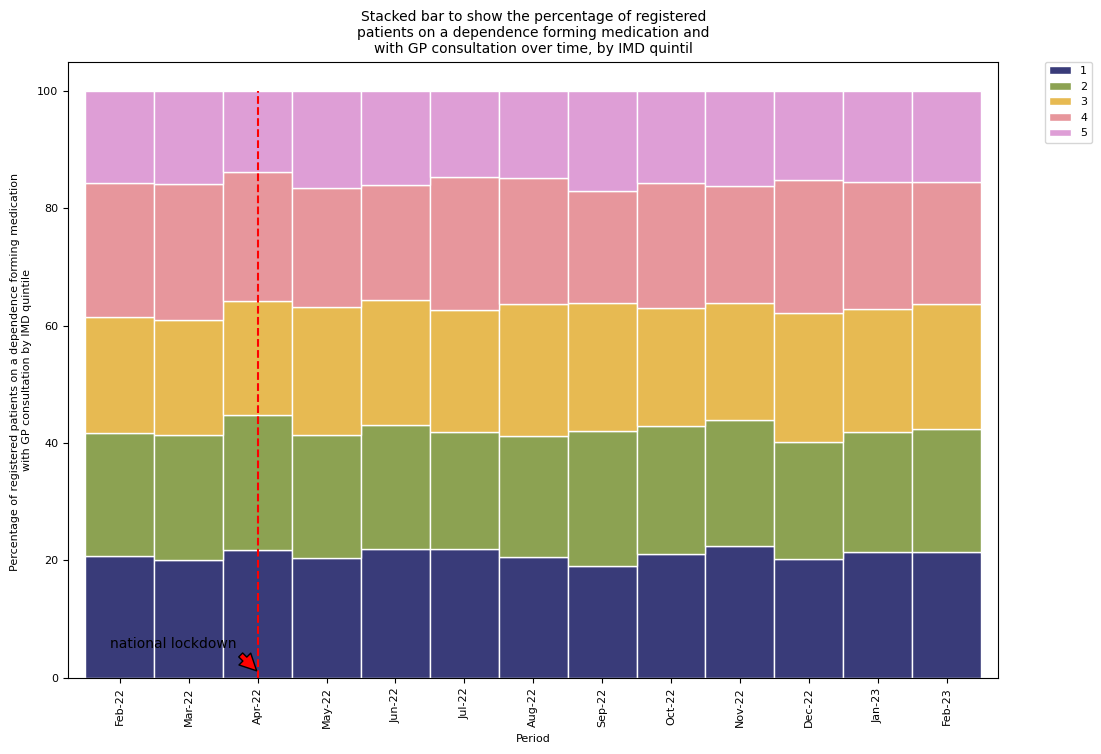

In [91]:
df_imd_consult_stacked = pd.DataFrame(df2)
df_imd_consult_stacked.head()
df_imd_consult_stacked.index = pd.to_datetime(df_imd_consult_stacked.index).strftime('%b-%y')
totic = df_imd_consult_stacked.sum(axis=1)
peric = df_imd_consult_stacked.div(totic, axis=0).mul(100).round(2)
ax = peric.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by IMD quintil'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_imd_rate_bar.png", bbox_inches='tight', dpi=100)
plt.show()

In [92]:
print(tabulate(peric.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peric.iloc[-1:], headers='keys', tablefmt = 'simple'))

date        1      2      3      4      5
------  -----  -----  -----  -----  -----
Feb-22  20.67  21.08  19.69  22.82  15.74
date        1      2     3      4      5
------  -----  -----  ----  -----  -----
Feb-23  21.44  21.02  21.3  20.67  15.56


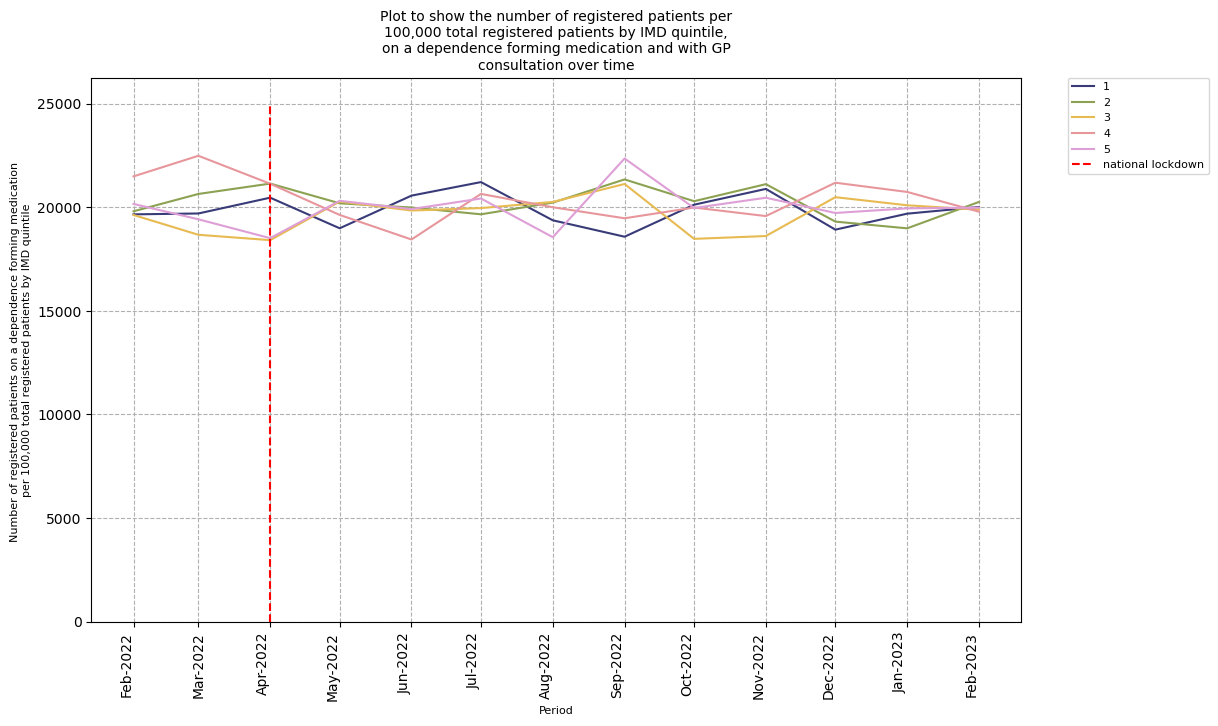

In [93]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'imd_q5']).research_population.sum().unstack() / df1.groupby(['date', 'imd_q5']).weighted_population.sum().unstack()

N = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by IMD quintile', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
        label="national lockdown",
    )

plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by IMD quintile, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["1", "2", "3", "4", "5", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_imd_weighted_plot.png", bbox_inches='tight', dpi=100)
plt.show()

In [94]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                     1        2        3        4        5
-------------------  -----  -------  -------  -------  -------
2022-02-01 00:00:00  19657  19804.6  19626.8  21489.2  20159.9
date                       1        2        3        4      5
-------------------  -------  -------  -------  -------  -----
2023-02-01 00:00:00  20013.1  20256.6  19882.3  19785.4  19982
